## Exercise 10 | Part 2

## Data Profiling

## Contents
### Import Libraries and Dataframe
### Create Subset of Data
### Data Profiles
### Age Profile and Visualizations
### Family Profile and Visualizations
### Income Profile and Visualizations
### Region Profile and Visualizations
### Loyalty Profile and Visualizations
### Frequent User Statistics

### Import Libraries and Dataframe

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import data for dataframe
path = r'/Users/abrockk12.wv.us/Documents/Career Foundry/Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [ ]:
# Import department data
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [ ]:
dept.head()

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequent_user,frequency,gender,state,age,n_dependents,fam_status,income,region,avg_price
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,3,6.367797
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,3,6.367797
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,3,6.367797
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,3,6.367797
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,3,6.367797


In [5]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_time_periods', 'max_order',
       'loyalty_flag', 'spender', 'frequent_user', 'frequency', 'gender',
       'state', 'age', 'n_dependents', 'fam_status', 'income', 'region',
       'avg_price'],
      dtype='object')

### Create Subset of Data

In [6]:
# Create data sample for profiles
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [7]:
big = df[dev]

In [8]:
small = df[~dev]

In [9]:
len(df)

30964564

In [10]:
len(big)

21676096

In [11]:
len(small)

9288468

In [12]:
len(big) + len(small)

30964564

In [13]:
len(small)/len(df)

0.299970895763299

In [14]:
df['prices'].describe()

count    3.095969e+07
mean     7.790590e+00
std      4.240595e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [15]:
small['prices'].describe()

count    9.286990e+06
mean     7.792040e+00
std      4.242194e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [16]:
# Create a subset of df with the columns I need with the 'small' dataframe
small.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_time_periods', 'max_order',
       'loyalty_flag', 'spender', 'frequent_user', 'frequency', 'gender',
       'state', 'age', 'n_dependents', 'fam_status', 'income', 'region',
       'avg_price'],
      dtype='object')

In [19]:
dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [20]:
# Merge departments data with small data frame
sm_dept = small.merge(dept, on = 'department_id', how = 'left', indicator = True)

In [21]:
sm_dept.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_time_periods', 'max_order',
       'loyalty_flag', 'spender', 'frequent_user', 'frequency', 'gender',
       'state', 'age', 'n_dependents', 'fam_status', 'income', 'region',
       'avg_price', 'department', '_merge'],
      dtype='object')

### Data Profiles

In [22]:
# Create an age_profile variable
sm_dept.loc[(sm_dept['age'] <=29) , 'age_profile'] = '18-30'

In [23]:
sm_dept.loc[(sm_dept['age'] >= 30) & (sm_dept['age'] <40) , 'age_profile'] = '30-39'

In [24]:
sm_dept.loc[(sm_dept['age'] >= 40) & (sm_dept['age'] <50) , 'age_profile'] = '40-49'

In [25]:
sm_dept.loc[(sm_dept['age'] >= 50) & (sm_dept['age'] <60) , 'age_profile'] = '50-59'

In [26]:
sm_dept.loc[(sm_dept['age'] >= 60) & (sm_dept['age'] <70) , 'age_profile'] = '60-69'

In [27]:
sm_dept.loc[(sm_dept['age'] >= 70) , 'age_profile'] = '70+'

In [28]:
sm_dept['income'].describe()

count    9.288468e+06
mean     9.968122e+04
std      4.317152e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676400e+04
75%      1.281100e+05
max      5.939010e+05
Name: income, dtype: float64

In [29]:
# Create an income_profile variable
sm_dept.loc[(sm_dept['income'] < 67000) , 'income_profile'] = '<$67,000'

In [153]:
sm_dept.loc[(sm_dept['income'] >= 67000) & (sm_dept['income'] <96000) , 'income_profile'] = '$67,000-$96,000'

In [155]:
sm_dept.loc[(sm_dept['income'] >= 96000) & (sm_dept['income'] <128000) , 'income_profile'] = '$96,000-$128,000'

In [32]:
sm_dept.loc[(sm_dept['income'] >= 128000) , 'income_profile'] = '$128,000+'

In [33]:
# Create a fam_profile variable based on their marrital status and number of children
sm_dept.loc[(sm_dept['n_dependents'] >= 1) & (sm_dept['fam_status'] =='married') , 'fam_profile'] = 'married with children'

In [34]:
sm_dept.loc[(sm_dept['n_dependents'] < 1) & (sm_dept['fam_status'] =='married') , 'fam_profile'] = 'married no children'

In [35]:
sm_dept.loc[(sm_dept['n_dependents'] >= 1) & (sm_dept['fam_status'] == 'single') , 'fam_profile'] = 'single with children'

In [36]:
sm_dept.loc[(sm_dept['n_dependents'] >= 1) & (sm_dept['fam_status'] == 'divorced/widowed') , 'fam_profile'] = 'divorced/widowed with children'

In [37]:
sm_dept.loc[(sm_dept['n_dependents'] < 1) & (sm_dept['fam_status'] == 'single') , 'fam_profile'] = 'single no children'

In [38]:
sm_dept.loc[(sm_dept['n_dependents'] < 1) & (sm_dept['fam_status'] == 'divorced/widowed') , 'fam_profile'] = 'divorced/widowed no children'

In [39]:
sm_dept.loc[(sm_dept['n_dependents'] >= 1) & (sm_dept['fam_status'] == 'living with parents and siblings') , 'fam_profile'] = 'lives with parents/siblings with children'

In [40]:
sm_dept.loc[(sm_dept['n_dependents'] < 1) & (sm_dept['fam_status'] == 'living with parents and siblings') , 'fam_profile'] = 'lives with parents/siblings no children'

In [150]:
# Create a price_range variable
sm_dept.loc[(sm_dept['prices']<=5), 'price_ranges'] = 'Low-price range'

In [156]:
sm_dept.loc[(sm_dept['prices']>5) & (sm_dept['prices'] <=15), 'price_ranges'] = 'Mid-price range'

In [157]:
sm_dept.loc[(sm_dept['prices']>15), 'price_ranges'] = 'High-price range'

In [158]:
sm_dept['price_ranges'].value_counts()

price_ranges
Mid-price range     6265833
Low-price range     2902999
High-price range     118158
Name: count, dtype: int64

In [41]:
sm_dept['fam_profile'].value_counts()

fam_profile
married with children                        6524243
single no children                           1526974
divorced/widowed no children                  792346
lives with parents/siblings with children     444905
Name: count, dtype: int64

In [42]:
sm_dept.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,n_dependents,fam_status,income,region,avg_price,department,_merge,age_profile,income_profile,fam_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,3,married,40423,3,6.367797,beverages,both,30-39,"<$67,000",married with children
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,3,married,40423,3,6.367797,beverages,both,30-39,"<$67,000",married with children
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,3,married,40423,3,6.367797,beverages,both,30-39,"<$67,000",married with children
3,550135,1,7,1,9,20.0,196,1,1,Soda,...,3,married,40423,3,6.367797,beverages,both,30-39,"<$67,000",married with children
4,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,3,married,40423,3,6.367797,dairy eggs,both,30-39,"<$67,000",married with children


In [43]:
# subset of sm_dept dataframe 
df_2 = sm_dept[['order_id', 'region', 'prices','avg_price','orders_day_of_week', 'order_hour_of_day', 'age','age_profile', 'income','income_profile' ,'department', 'n_dependents', 'fam_status', 'fam_profile', 'loyalty_flag']]

In [44]:
df_2.head()

,order_id,region,prices,avg_price,orders_day_of_week,order_hour_of_day,age,age_profile,income,income_profile,department,n_dependents,fam_status,fam_profile,loyalty_flag
0,2539329,3,9.0,6.367797,2,8,31,30-39,40423,"<$67,000",beverages,3,married,married with children,New customer
1,473747,3,9.0,6.367797,3,12,31,30-39,40423,"<$67,000",beverages,3,married,married with children,New customer
2,2254736,3,9.0,6.367797,4,7,31,30-39,40423,"<$67,000",beverages,3,married,married with children,New customer
3,550135,3,9.0,6.367797,1,9,31,30-39,40423,"<$67,000",beverages,3,married,married with children,New customer
4,2539329,3,12.5,6.367797,2,8,31,30-39,40423,"<$67,000",dairy eggs,3,married,married with children,New customer


### Age Profile and Visualizations

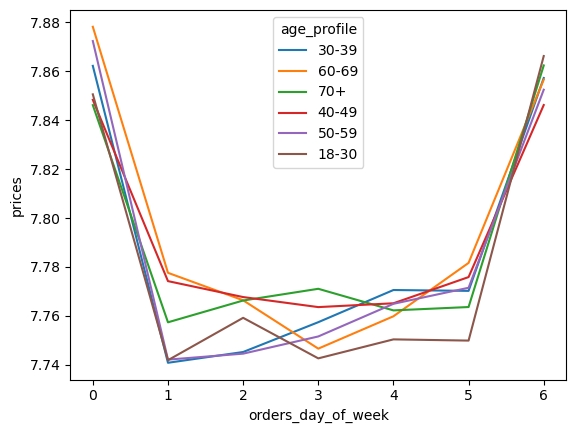

In [45]:
# Compare age money spent per day of week
age_dow_line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices', hue = 'age_profile', palette = 'tab10', ci = None)

In [46]:
# Save figure
age_dow_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dow_line.png'))

In [47]:
# aggregate prices data for each age group
age_agg = df_2.groupby(['department', 'age_profile','region'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
age_agg.head()

,department,age_profile,region,order_id,prices
0,alcohol,18-30,1,1354,10962.6
1,alcohol,18-30,2,2058,16326.2
2,alcohol,18-30,3,2835,23542.4
3,alcohol,18-30,4,2086,16865.5
4,alcohol,30-39,1,1407,11044.2


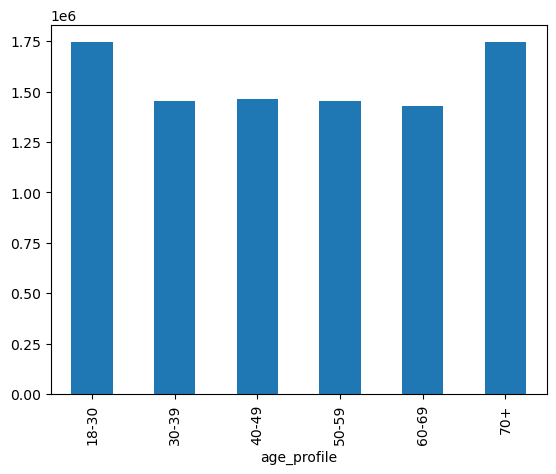

In [48]:
age_bar = df_2['age_profile'].value_counts().sort_index().plot.bar()

In [49]:
# Save figure
age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_bar.png'))

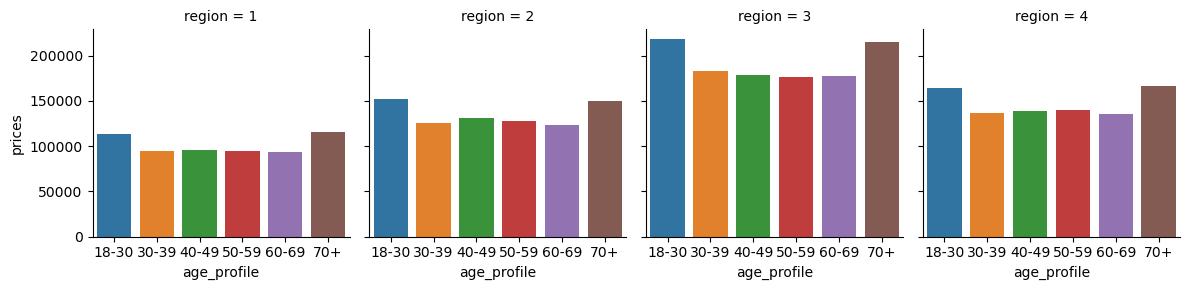

In [50]:
# age profiles broken down by each region
age_region_bar = sns.FacetGrid(age_agg, col="region")
age_region_bar.map(sns.barplot, "age_profile", "prices", palette='tab10',ci=None)

In [51]:
# Save figure
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_bar.png'))

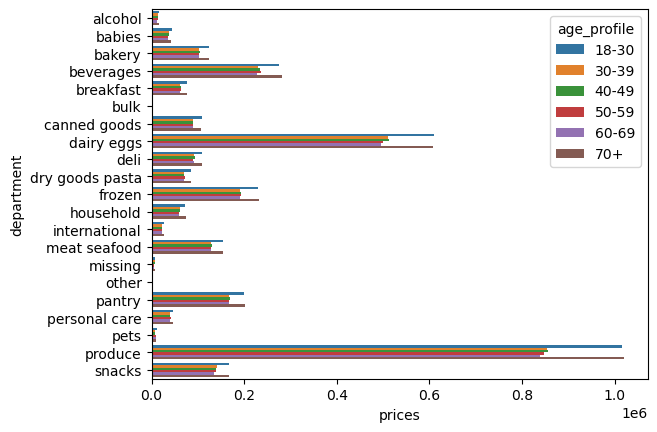

In [52]:
# age and department comparison
age_dept_bar = sns.barplot(data = age_agg, x = 'prices', y = 'department', hue = 'age_profile', ci = None)

In [53]:
# Save figure
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dept_bar.png'))

### Family Profile and Visualizations

In [54]:
# aggregate family data
dependents_agg = df_2.groupby(['n_dependents', 'age_profile','region'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
dependents_agg.head()

,n_dependents,age_profile,region,order_id,prices
0,0,18-30,1,79201,615955.5
1,0,18-30,2,98846,773841.1
2,0,18-30,3,148188,1150952.3
3,0,18-30,4,107485,829921.6
4,0,30-39,1,61811,477878.8


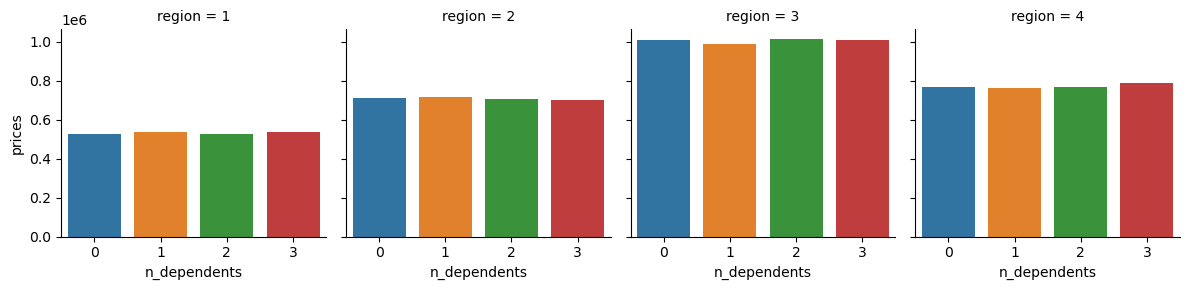

In [55]:
# number of dependents broken down by region
kid_region_bar = sns.FacetGrid(dependents_agg, col="region")
kid_region_bar.map(sns.barplot, "n_dependents", "prices", palette='tab10',ci=None)

In [56]:
# Save figure
kid_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'kid_region_bar.png'))

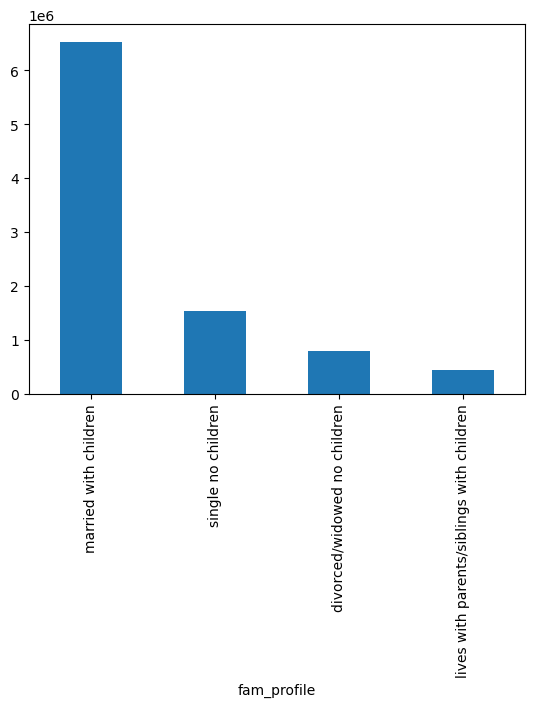

In [57]:
family_size_bar = sm_dept['fam_profile'].value_counts().plot.bar()

In [58]:
# Save figure
family_size_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_size_bar.png'))

In [59]:
family_agg = df_2.groupby(['fam_profile','region'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
family_agg.head()

,fam_profile,region,order_id,prices
0,divorced/widowed no children,1,143080,1117057.4
1,divorced/widowed no children,2,184723,1439640.4
2,divorced/widowed no children,3,263441,2057010.5
3,divorced/widowed no children,4,201102,1566015.8
4,lives with parents/siblings with children,1,77002,597598.9


In [60]:
df_2['fam_profile'].value_counts()

fam_profile
married with children                        6524243
single no children                           1526974
divorced/widowed no children                  792346
lives with parents/siblings with children     444905
Name: count, dtype: int64

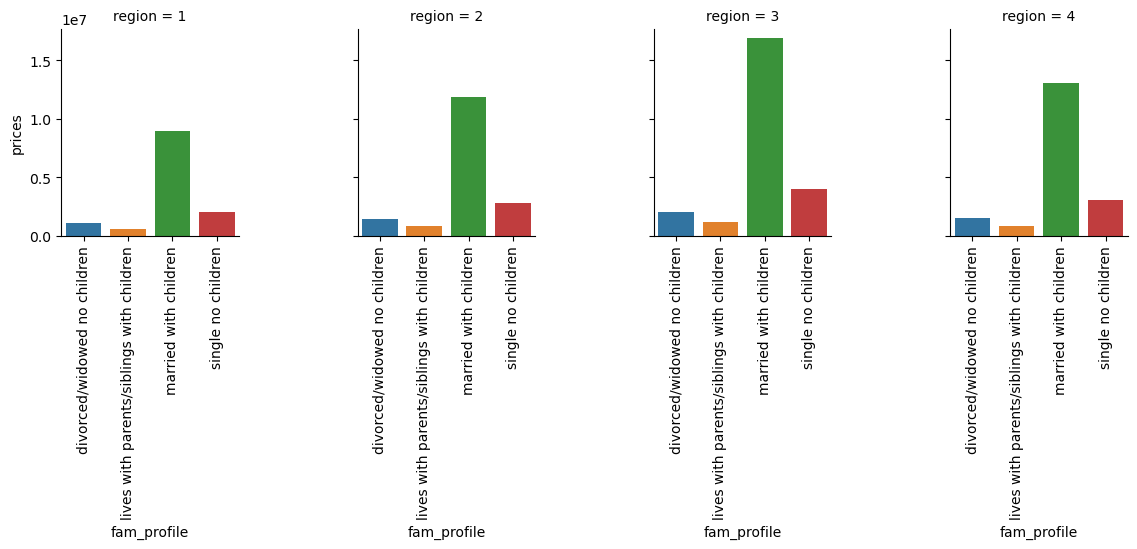

In [61]:
# Family size by region
family_region_bar = sns.FacetGrid(family_agg, col="region")
family_region_bar.map(sns.barplot, "fam_profile", "prices", palette='tab10',ci=None)
family_region_bar.set_xticklabels(rotation='vertical')

In [62]:
# Save figure
family_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_region_bar.png'), bbox_inches = 'tight')

In [63]:
fam_region_agg = df_2.groupby(['region','fam_profile'], as_index=False).agg({'prices': 'sum'})
fam_region_agg.head()

,region,fam_profile,prices
0,1,divorced/widowed no children,1117057.4
1,1,lives with parents/siblings with children,597598.9
2,1,married with children,8992212.5
3,1,single no children,2040238.4
4,2,divorced/widowed no children,1439640.4


In [64]:
# Create pivot table
fam_pivot = pd.pivot_table(data = fam_region_agg, index = ['region'], columns = ['fam_profile'], values = 'prices')

In [65]:
fam_pivot.head()

fam_profile,divorced/widowed no children,lives with parents/siblings with children,married with children,single no children
region,,,,
1,1117057.4,597598.9,8992212.5,2040238.4
2,1439640.4,828137.4,11907552.4,2820314.0
3,2057010.5,1189706.4,16873237.5,3985031.8
4,1566015.8,859657.6,13051216.6,3039974.6


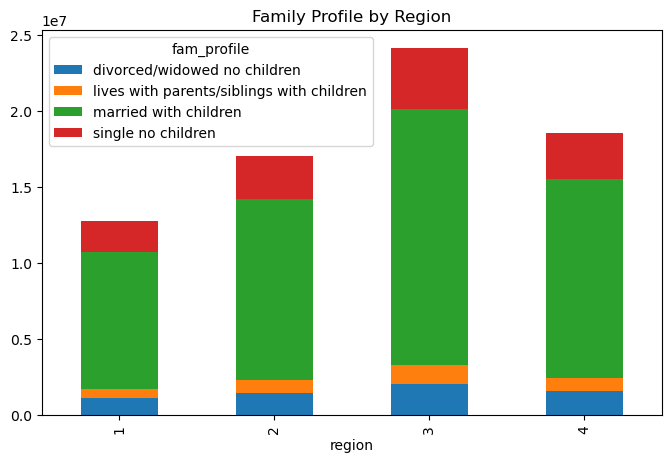

In [66]:
family_region_stack = fam_pivot.plot.bar(stacked = True, title = 'Family Profile by Region', figsize = (8,5))

In [67]:
# Save figure
family_region_stack.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_region_stack.png'))

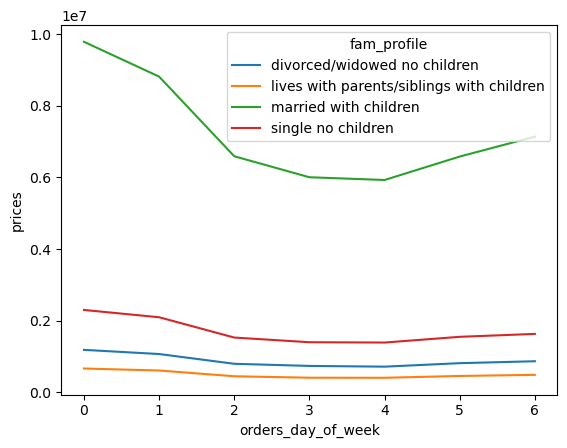

In [194]:
family_dow_line = sns.lineplot(data = fam_prices_agg, x = 'orders_day_of_week', y = 'prices', hue = 'fam_profile', ci = None )

In [195]:
family_dow_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_dow_line.png'))

In [196]:
fam_prices_agg2 = df_2.groupby(['fam_profile', 'order_hour_of_day'], as_index=False).agg({'prices': 'sum'})

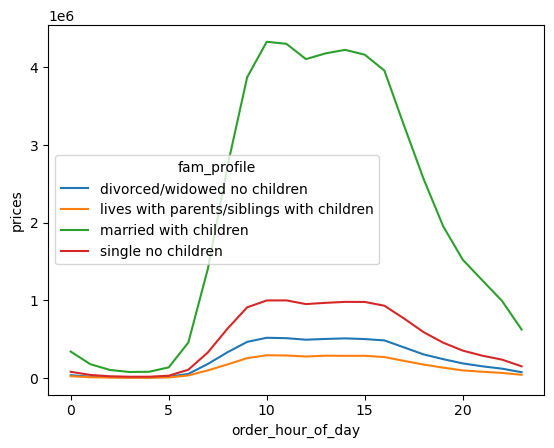

In [197]:
family_hod_line = sns.lineplot(data = fam_prices_agg2, x = 'order_hour_of_day', y = 'prices', hue = 'fam_profile', ci = None)

In [198]:
family_hod_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_hod_line.png'))

In [205]:
fam_dept_agg = df_2.groupby(['fam_profile', 'department'], as_index = False).agg({'prices':'sum'})

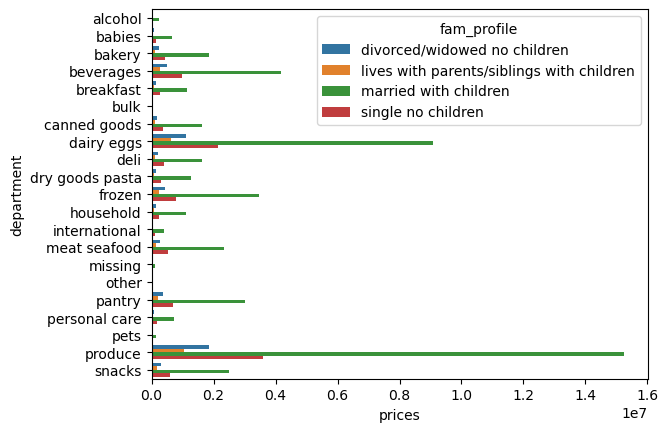

In [206]:
fam_dept_bar = sns.barplot(data = fam_dept_agg, x = 'prices', y = 'department', hue = 'fam_profile', ci = None)

In [207]:
fam_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_dept_bar.png'), bbox_inches = 'tight')

In [193]:
fam_prices_agg = df_2.groupby(['fam_profile', 'orders_day_of_week'], as_index=False).agg({'prices': 'sum'})
fam_prices_agg.head()

,fam_profile,orders_day_of_week,prices
0,divorced/widowed no children,0,1184416.3
1,divorced/widowed no children,1,1068450.2
2,divorced/widowed no children,2,795312.8
3,divorced/widowed no children,3,736252.3
4,divorced/widowed no children,4,715559.9


(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed no children'),
  Text(1, 0, 'lives with parents/siblings with children'),
  Text(2, 0, 'married with children'),
  Text(3, 0, 'single no children')])

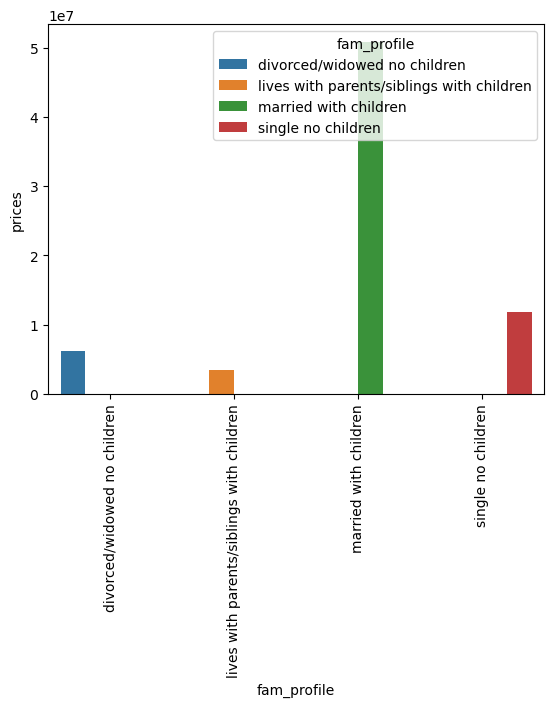

In [75]:
fam_prices_bar = sns.barplot(data = fam_prices_agg, x = 'fam_profile', y = 'prices', hue = 'fam_profile', ci = None)
plt.xticks(rotation = 90)

In [222]:
# number of products in each department
product_count = sm_dept.groupby(['department'], as_index = False).agg({'product_name':'nunique', 'order_id':'count'})
product_count.head()

,department,product_name,order_id
0,alcohol,1004,42860
1,babies,1054,123110
2,bakery,1488,336128
3,beverages,4260,772594
4,breakfast,1096,201827


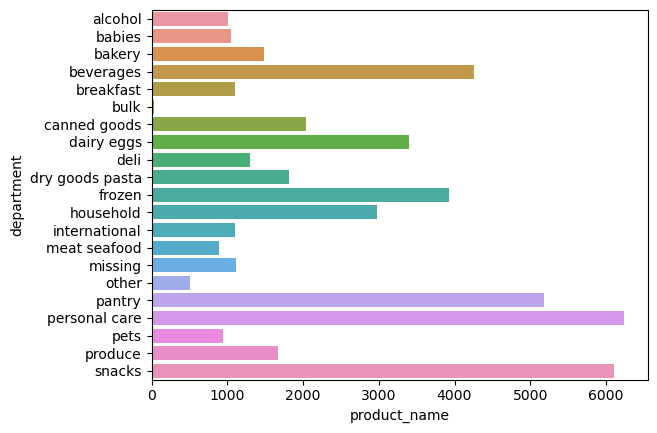

In [227]:
product_count_bar = sns.barplot(data = product_count, x = 'product_name', y = 'department', ci = None)

In [228]:
product_count_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'product_count_bar.png'), bbox_inches = 'tight')

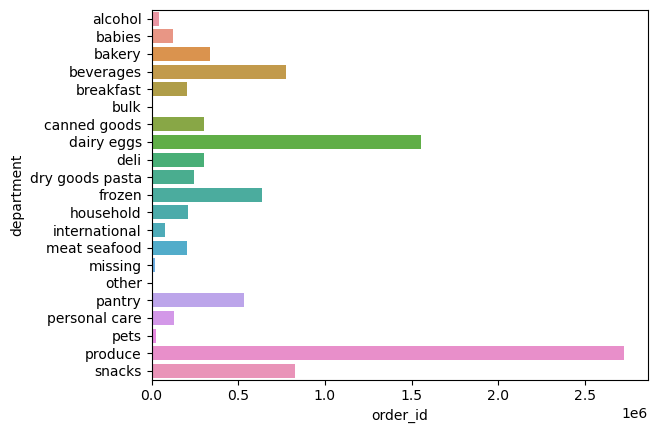

In [230]:
# number of orders for each department
order_count_bar = sns.barplot(data = product_count, x = 'order_id', y = 'department', ci = None)

In [231]:
order_count_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_count_bar.png'), bbox_inches = 'tight')

In [76]:
fam_pivot2 = pd.pivot_table(data = fam_region_agg, index = ['fam_profile'], columns = ['region'], values = 'prices')

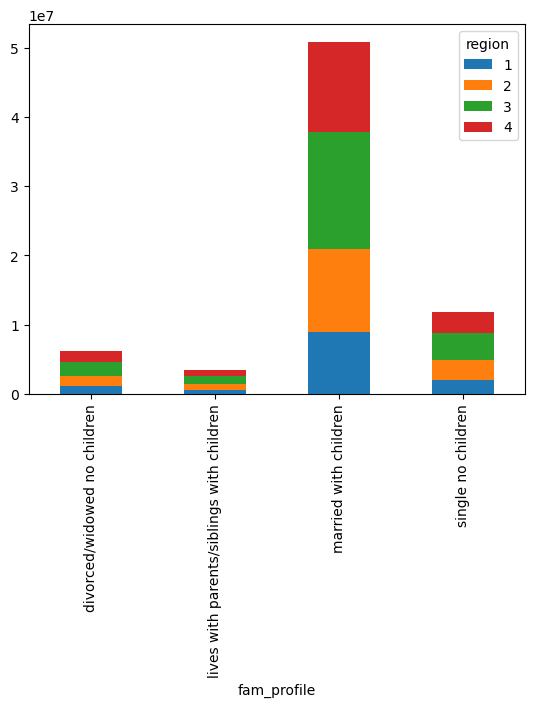

In [77]:
# number of fam_profile for each region
fam_region_stack2 = fam_pivot2.plot.bar(stacked = True)

In [78]:
fam_region_stack2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_region_stack2.png'), bbox_inches = 'tight')

### Income Profile and Visualizations

In [79]:
# Aggregate income data
income_agg = df_2.groupby(['income_profile','region', 'department'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
income_agg.head()

,income_profile,region,department,order_id,prices
0,"$128,000+",1,alcohol,2455,20721.9
1,"$128,000+",1,babies,5673,44528.2
2,"$128,000+",1,bakery,15191,120679.5
3,"$128,000+",1,beverages,34525,272780.3
4,"$128,000+",1,breakfast,8317,67380.5


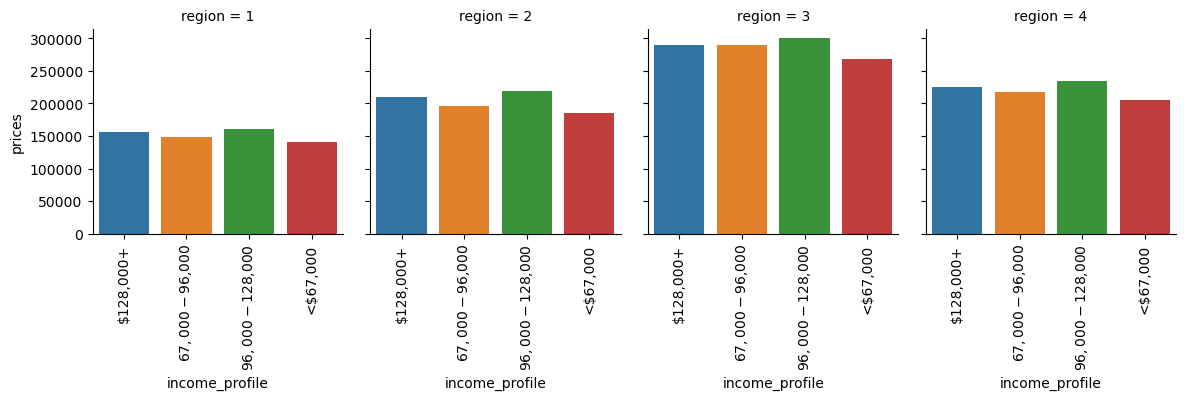

In [80]:
# income broken down by region
income_region_bar = sns.FacetGrid(income_agg, col="region")
income_region_bar.map(sns.barplot, "income_profile", "prices", palette='tab10',ci=None)
income_region_bar.set_xticklabels(rotation='vertical')

In [81]:
# Save figure
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

In [82]:
# Create pivot table 
income_pivot = pd.pivot_table(data = income_agg, index = ['region'], columns = ['income_profile'], values = 'prices')

In [83]:
income_pivot.head()

income_profile,"$128,000+","$67,000-$96,000","$96,000-$128,000","<$67,000"
region,,,,
1,156033.928571,148853.861905,161071.309524,141046.004762
2,209668.590476,196005.485714,218698.314286,184944.000000
3,290042.804762,290113.404762,299970.176190,267730.100000
4,224977.671429,217761.528571,233985.909524,205030.347619


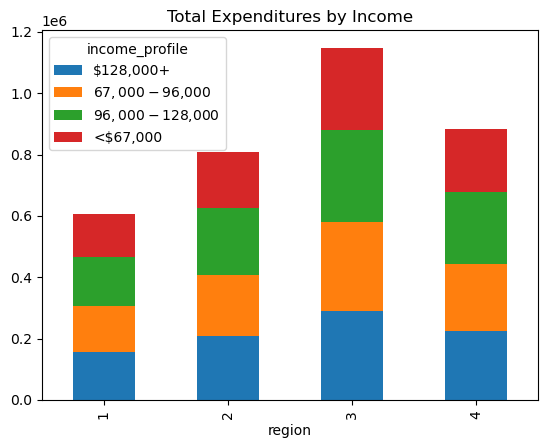

In [84]:
income_region_stack = income_pivot.plot.bar(stacked = True, title = 'Total Expenditures by Income')

In [85]:
# Save figure
income_region_stack.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_stack.png'))

In [86]:
income_dept_pivot = pd.pivot_table(data = income_agg, index = ['department'], columns = ['income_profile'], values = 'prices')

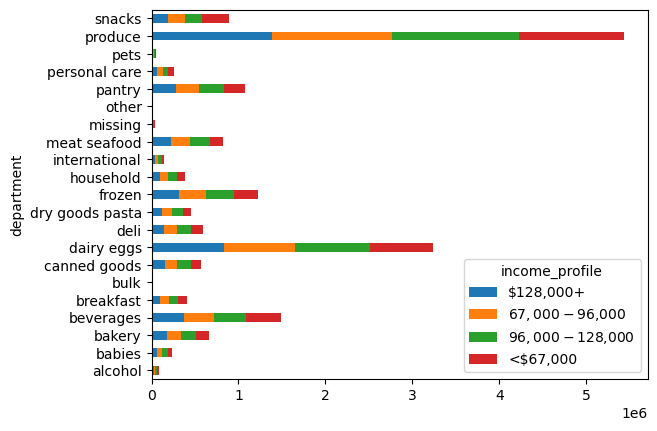

In [87]:
# stacked chart of income profiles for each department
income_dept_stack = income_dept_pivot.plot.barh(stacked = True)

In [88]:
# Save figure
income_dept_stack.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_dept_stack.png'))

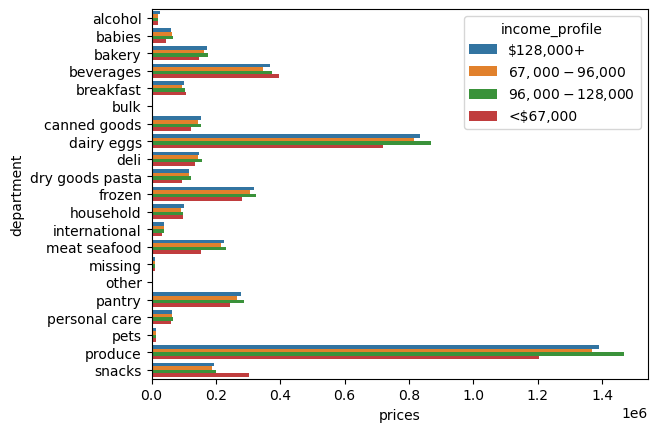

In [89]:
income_dept_bar = sns.barplot(data = income_agg, x = 'prices', y = 'department', hue = 'income_profile', ci = None)

In [90]:
# Save figure
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_dept_bar.png'))

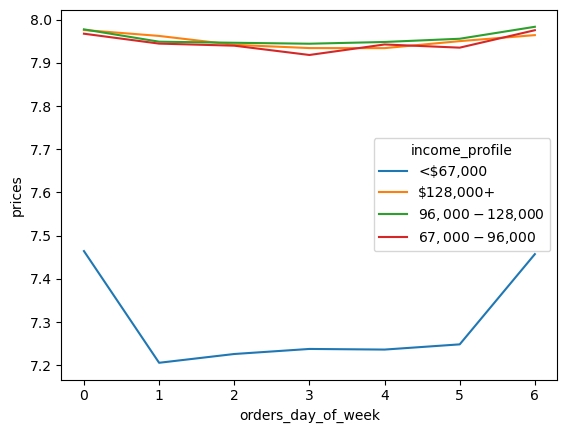

In [91]:
# money spent for each day of the week by income
income_dow_line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices', hue = 'income_profile', ci = None)

In [92]:
# Save figure
income_dow_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_dow_line.png'))

### Region Profile and Visualizations

In [209]:
region_dept_agg = df_2.groupby(['department', 'region'], as_index = False).agg({'order_id':'count'})

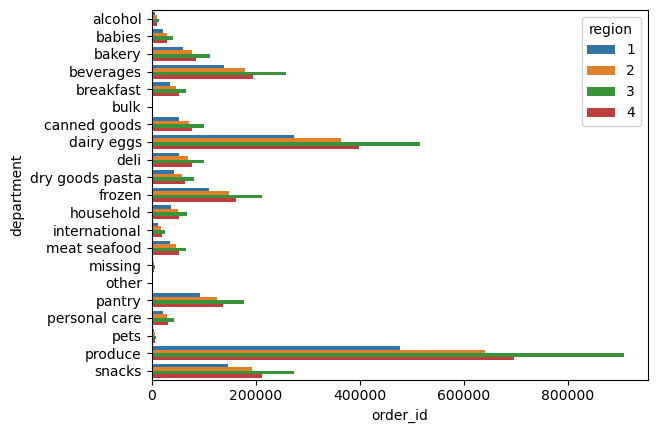

In [210]:
region_dept_bar = sns.barplot(data = region_dept_agg, x = 'order_id', y = 'department', hue = 'region', ci = None)

In [211]:
# Save figure
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_dept_bar.png'), bbox_inches = 'tight')

In [178]:
dow_region_agg = df_2.groupby(['orders_day_of_week', 'region'], as_index = False).agg({'prices':'sum'})

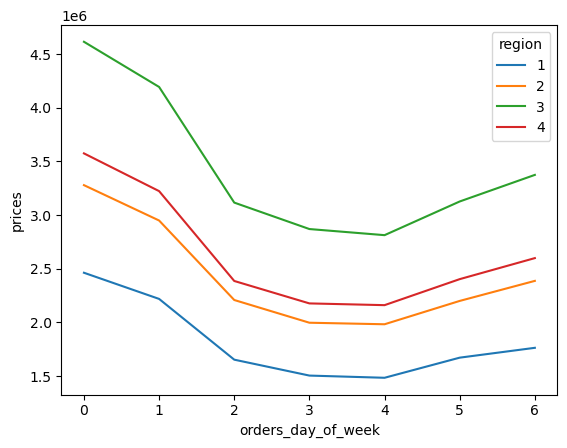

In [179]:
# money spent for each day of the week by region
dow_region_line = sns.lineplot(data = dow_region_agg, x = 'orders_day_of_week', y = 'prices', hue = 'region', ci = None)

In [180]:
# Save figure
dow_region_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dow_region_line.png'))

In [190]:
hod_region_agg = df_2.groupby(['order_hour_of_day','region'], as_index = False).agg({'prices':'sum'})

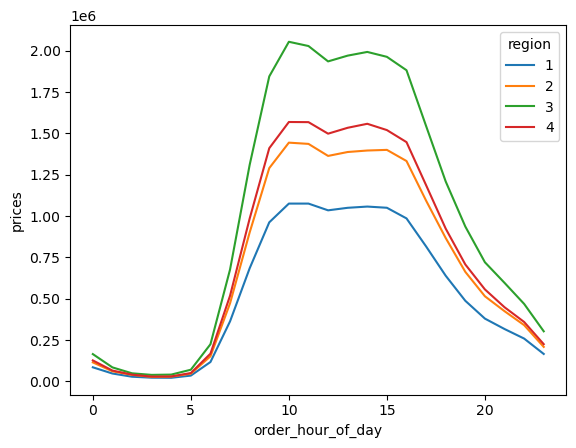

In [191]:
# money spent for each hour of the day by region
hod_region_line = sns.lineplot(data = hod_region_agg, x = 'order_hour_of_day', y = 'prices', hue = 'region', ci = None)

In [192]:
hod_region_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hod_region_line.png'))

In [99]:
region_agg = df_2.groupby(['region'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
region_agg.head()

,region,order_id,prices
0,1,1639014,12747107.2
1,2,2179422,16995644.2
2,3,3092921,24104986.2
3,4,2377111,18516864.6


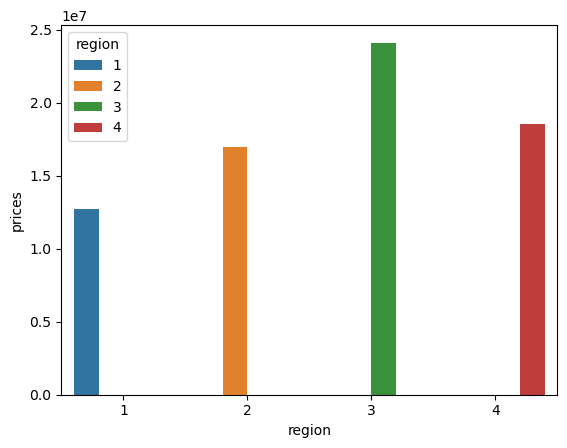

In [100]:
region_prices_bar = sns.barplot(data = region_agg, x = 'region', y = 'prices', hue = 'region')

In [101]:
region_prices_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_prices_bar.png'))

### Loyalty Profile and Visualizations

In [172]:
loyal_agg = df_2.groupby(['loyalty_flag', 'orders_day_of_week'], as_index = False).agg({'prices':'sum'})

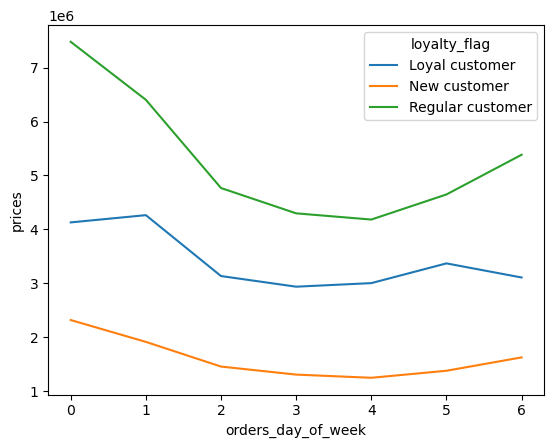

In [173]:
# money spent for each day of the week by the type of customer
loyal_dow_line = sns.lineplot(data = loyal_agg, x = 'orders_day_of_week', y = 'prices', hue = 'loyalty_flag')

In [174]:
# Save figure
loyal_dow_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_dow_line.png'))

In [175]:
loyal_hod_agg = df_2.groupby(['loyalty_flag', 'order_hour_of_day'], as_index = False).agg({'prices':'sum'})

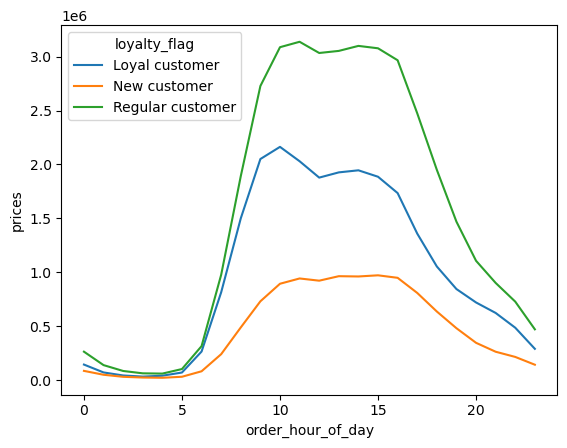

In [176]:
# money spent for each hour of the day for each type of customer
loyal_hod_line = sns.lineplot(data = loyal_hod_agg, x = 'order_hour_of_day', y = 'prices', hue = 'loyalty_flag', ci = None)

In [177]:
# Save figure
loyal_hod_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_hod_line.png'))

In [106]:
# Aggregate loyalty data
loyal_agg = df_2.groupby(['region', 'loyalty_flag', 'department'], as_index = False).agg({'prices': 'sum'})
loyal_agg.head()

,region,loyalty_flag,department,prices
0,1,Loyal customer,alcohol,15303.0
1,1,Loyal customer,babies,67171.2
2,1,Loyal customer,bakery,164373.5
3,1,Loyal customer,beverages,366313.3
4,1,Loyal customer,breakfast,96979.8


In [107]:
loyal_agg2 = df_2.groupby(['region', 'loyalty_flag', 'department'], as_index = False).agg({'prices': 'mean'})
loyal_agg2

,region,loyalty_flag,department,prices
0,1,Loyal customer,alcohol,7.783825
1,1,Loyal customer,babies,7.625292
2,1,Loyal customer,bakery,7.922760
3,1,Loyal customer,beverages,7.707154
4,1,Loyal customer,breakfast,7.997674
...,...,...,...,...
247,4,Regular customer,pantry,7.990011
248,4,Regular customer,personal care,7.982881
249,4,Regular customer,pets,8.098152
250,4,Regular customer,produce,7.991654


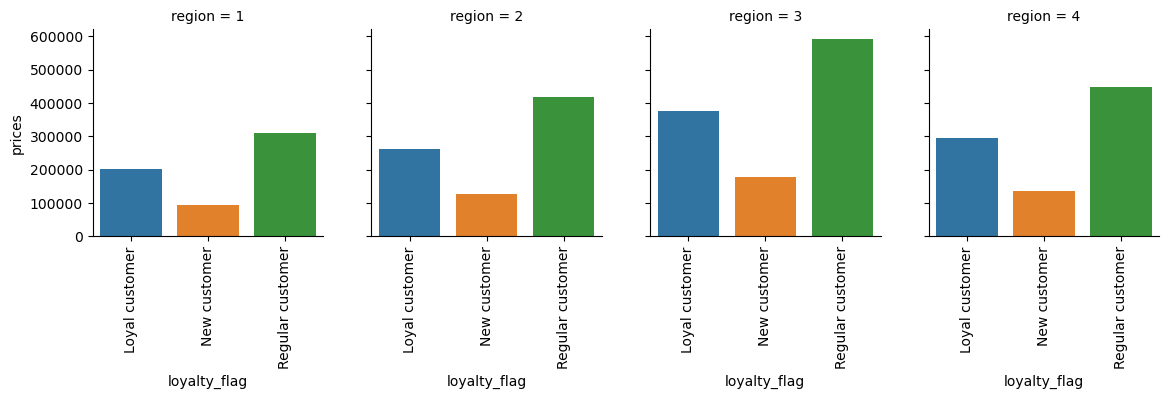

In [108]:
# number of customer loyalty type by region
loyal_bar = sns.FacetGrid(loyal_agg, col ='region')
loyal_bar.map(sns.barplot, "loyalty_flag", "prices", palette='tab10',ci=None)
loyal_bar.set_xticklabels(rotation = 'vertical')

In [109]:
# Save figure
loyal_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_bar.png'))

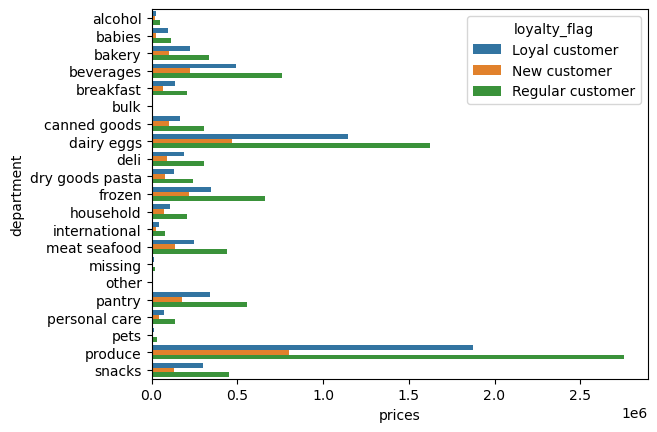

In [110]:
# Comparing customer loyalty type with each department
loyal_dept = sns.barplot(data = loyal_agg, x = 'prices', y = 'department', hue = 'loyalty_flag', ci = None)

In [111]:
# Save figure
loyal_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_dept.png'), bbox_inches = 'tight')

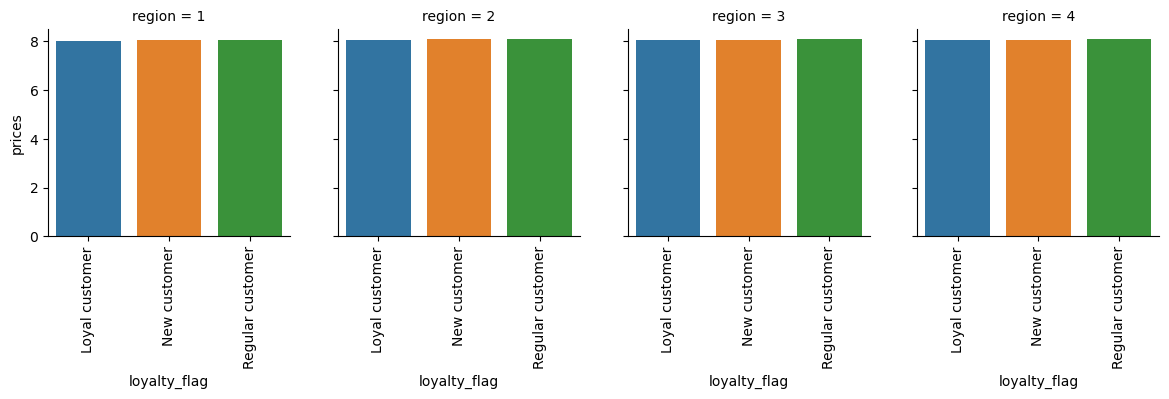

In [112]:
loyal_prices_bar = sns.FacetGrid(loyal_agg2, col ='region')
loyal_prices_bar.map(sns.barplot, "loyalty_flag", "prices", palette='tab10',ci=None)
loyal_prices_bar.set_xticklabels(rotation = 'vertical')

In [113]:
dow_agg = df_2.groupby(['orders_day_of_week'], as_index = False).agg({'prices': 'sum'})
dow_agg.head()

,orders_day_of_week,prices
0,0,13929035.0
1,1,12582457.9
2,2,9359005.2
3,3,8543066.7
4,4,8434945.3


In [213]:
dow_orderid_agg = df_2.groupby(['orders_day_of_week'], as_index = False).agg({'order_id':'count'})

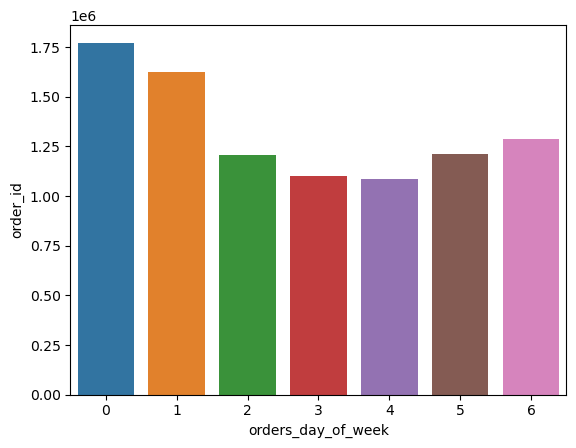

In [214]:
# order count by day of the week
dow_order_bar = sns.barplot(data = dow_orderid_agg, x = 'orders_day_of_week', y = 'order_id', ci = None)

In [215]:
dow_order_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dow_order_bar.png'))

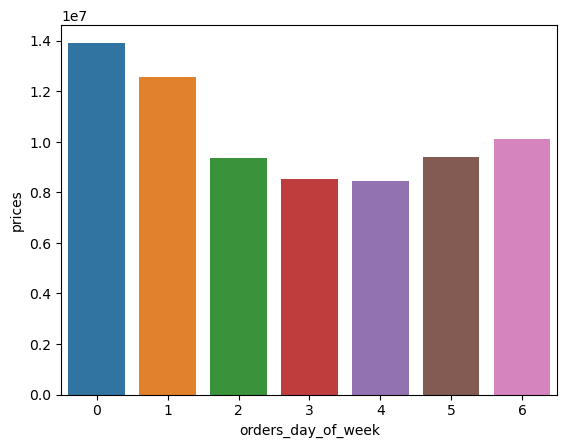

In [114]:
# price count by day of the week
dow_prices_bar = sns.barplot(data = dow_agg, x = 'orders_day_of_week', y = 'prices', ci = None)

In [115]:
dow_prices_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dow_prices_bar.png'))

In [116]:
hod_agg = df_2.groupby(['order_hour_of_day'], as_index = False).agg({'prices': 'sum'})
hod_agg.head()

,order_hour_of_day,prices
0,0,489107.7
1,1,255354.4
2,2,153831.3
3,3,114672.0
4,4,118269.6


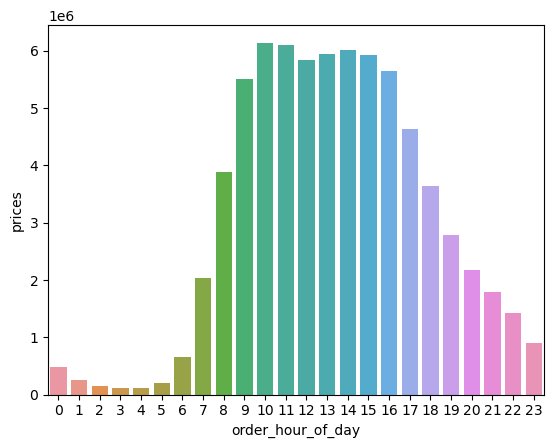

In [117]:
# Total money spent for each hour of the day
hod_prices_bar = sns.barplot(data = hod_agg, x = 'order_hour_of_day', y = 'prices', ci = None)

In [118]:
hod_prices_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hod_prices_bar.png'))

In [135]:
hod_orders_agg = df_2.groupby(['order_hour_of_day'], as_index = False).agg({'order_id':'sum'})

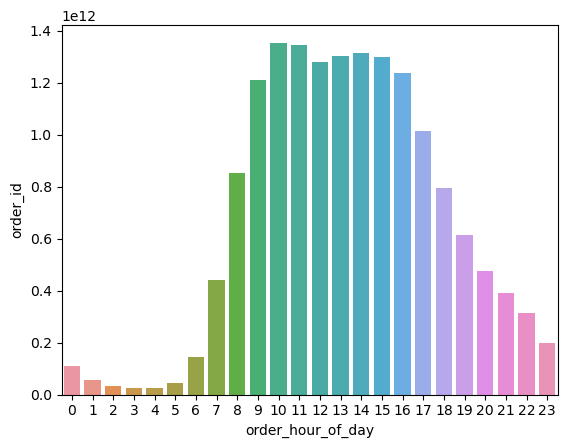

In [136]:
# number of orders for each hour of the day
hod_orders_bar = sns.barplot(data = hod_orders_agg, x = 'order_hour_of_day', y = 'order_id', ci = None)

In [137]:
hod_orders_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hod_orders_bar.png'))

In [119]:
hod_age_agg = df_2.groupby(['order_hour_of_day', 'fam_profile'], as_index = False).agg({'prices':'sum'})
hod_age_agg.head()

,order_hour_of_day,fam_profile,prices
0,0,divorced/widowed no children,38381.7
1,0,lives with parents/siblings with children,25475.9
2,0,married with children,342676.3
3,0,single no children,82573.8
4,1,divorced/widowed no children,19692.1


In [120]:
hod_age_agg_pivot = pd.pivot_table(data = hod_age_agg, index = 'order_hour_of_day', columns = 'fam_profile', values = 'prices')
hod_age_agg_pivot.head()

fam_profile,divorced/widowed no children,lives with parents/siblings with children,married with children,single no children
order_hour_of_day,,,,
0,38381.7,25475.9,342676.3,82573.8
1,19692.1,12723.2,180641.2,42297.9
2,14552.8,7898.0,106358.9,25021.6
3,10388.9,5524.1,79795.3,18963.7
4,9254.2,6633.7,83046.3,19335.4


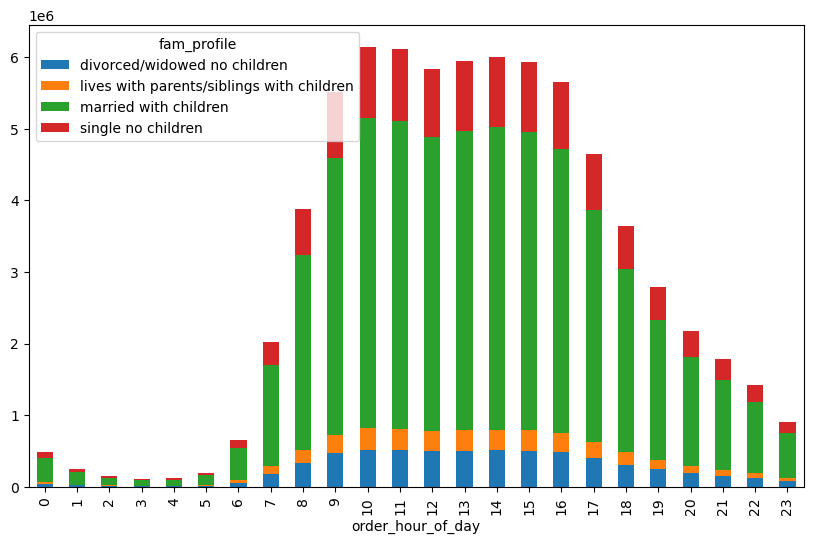

In [121]:
hod_age_stack = hod_age_agg_pivot.plot.bar(stacked = True, figsize = (10,6))

In [122]:
hod_age_stack.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hod_age_stack.png'))

In [165]:
price_range_agg = sm_dept.groupby(['price_ranges'], as_index = False).agg({'prices':'sum', 'order_id':'sum'})
price_range_agg.head()

,price_ranges,prices,order_id
0,High-price range,2436201.4,201695576601
1,Low-price range,8778405.1,4961127616690
2,Mid-price range,61149995.7,10715206084370


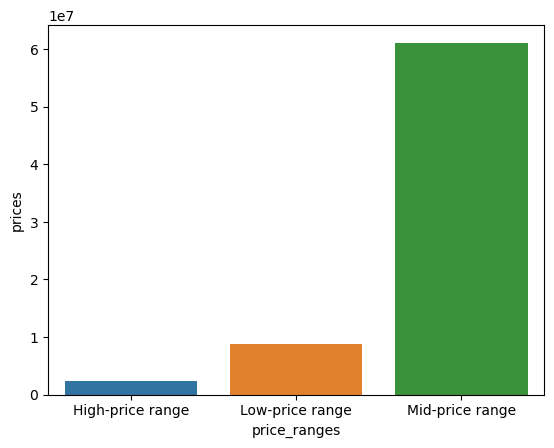

In [168]:
price_range_bar = sns.barplot(data = price_range_agg, x = 'price_ranges', y = 'prices', ci = None)

In [164]:
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_bar.png'))

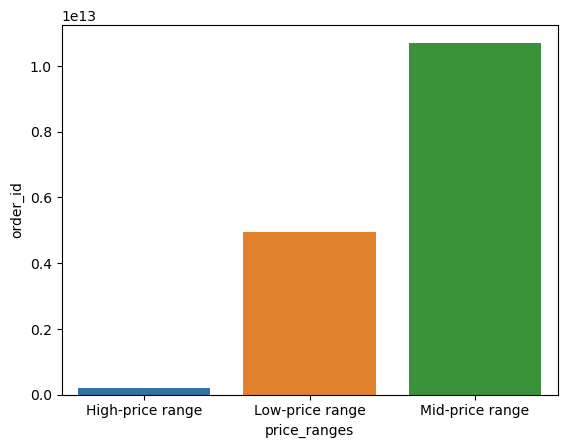

In [169]:
# number of orders for each price range
price_range_order_bar = sns.barplot(data = price_range_agg, x = 'price_ranges', y = 'order_id', ci = None)

In [170]:
price_range_order_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_order_bar.png'))

In [123]:
produce_stuff = sm_dept[['department', 'product_name', 'prices']]

In [124]:
produce = produce_stuff.loc[produce_stuff['department']=='produce']

In [125]:
produce.head(60)

,department,product_name,prices
14,produce,Bartlett Pears,5.0
40,produce,Granny Smith Apples,8.8
88,produce,Vine Ripe Tomatoes,14.3
103,produce,Organic Avocado,6.3
104,produce,Organic Gala Apples,9.1
105,produce,Banana,12.3
107,produce,Raspberries,1.4
112,produce,"Clementines, Bag",3.8
147,produce,Organic Fuji Apple,1.6
148,produce,Organic Fuji Apple,1.6


In [126]:
produce_agg = produce.groupby('product_name').agg({'prices': 'sum'})
produce_table = produce_agg.head(15).sort_values('prices', ascending = False)

In [127]:
##produce_bar = sns.barplot(data = produce_agg, x = 'prices',y = 'product_name', ci = None)

In [128]:
df.groupby('product_name').agg({'prices': 'sum'})

,prices
product_name,
#2 Coffee Filters,8283.0
#2 Cone White Coffee Filters,74.1
#2 Mechanical Pencils,73.6
#4 Natural Brown Coffee Filters,570.0
#NAME?,100.8
...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,167.4
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,280.8
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,238.0


### Aggregate the max, min, and mean variables on the different profiles

In [129]:
# frequent user statistics by age group
sm_dept.groupby('age_profile').agg({'frequent_user': ['mean','max','min'], 'prices': ['sum','mean','max','min']})#

frequent_user                 prices                     
                     mean   max  min         sum      mean   max  min
age_profile                                                          
18-30            9.943263  30.0  0.0  13581901.9  7.784293  25.0  1.0
30-39            9.962922  30.0  0.0  11339298.1  7.789702  25.0  1.0
40-49            9.962581  30.0  0.0  11415757.6  7.795418  25.0  1.0
50-59            9.988729  30.0  0.0  11304866.0  7.790216  25.0  1.0
60-69            9.942870  30.0  0.0  11136141.6  7.800866  25.0  1.0
70+              9.959896  30.0  0.0  13586637.0  7.793202  25.0  1.0

In [130]:
# frequent user statistics by region
sm_dept.groupby('region').agg({'frequent_user': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

frequent_user                 prices                     
                mean   max  min         sum      mean   max  min
region                                                          
1           9.929804  30.0  0.0  12747107.2  7.778436  25.0  1.0
2          10.017048  30.0  0.0  16995644.2  7.799459  25.0  1.0
3           9.958714  30.0  0.0  24104986.2  7.794897  25.0  1.0
4           9.928459  30.0  0.0  18516864.6  7.790903  25.0  1.0

In [212]:
# frequent user description
sm_dept['frequent_user'].describe()

count    9.288468e+06
mean     9.959557e+00
std      6.667196e+00
min      0.000000e+00
25%      6.000000e+00
50%      7.000000e+00
75%      1.250000e+01
max      3.000000e+01
Name: frequent_user, dtype: float64

In [131]:
# frequent user by income group
sm_dept.groupby('income_profile').agg({'frequent_user': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

frequent_user                 prices                     
                          mean   max  min         sum      mean   max  min
income_profile                                                            
$128,000+             9.877218  30.0  0.0  18495182.9  7.954490  25.0  1.0
$67,000-$96,000       9.859888  30.0  0.0  17907419.9  7.948372  25.0  1.0
$96,000-$128,000      9.904614  30.0  0.0  19188239.9  7.959481  25.0  1.0
<$67,000             10.198257  30.0  0.0  16773759.5  7.298784  25.0  1.0

In [132]:
# frequent user by family profile
sm_dept.groupby('fam_profile').agg({'frequent_user': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

frequent_user             \
                                                   mean   max  min   
fam_profile                                                          
divorced/widowed no children                   9.878206  30.0  0.0   
lives with parents/siblings with children      9.881064  30.0  0.0   
married with children                          9.971824  30.0  0.0   
single no children                             9.972229  30.0  0.0   

                                               prices                       
                                                  sum      mean   max  min  
fam_profile                                                                 
divorced/widowed no children                6179724.1  7.800584  25.0  1.0  
lives with parents/siblings with children   3475100.3  7.811777  25.0  1.0  
married with children                      50824219.0  7.791318  25.0  1.0  
single no children                         11885558.8  7.784942  25.0  1.0

In [133]:
# frequent user by department
sm_dept.groupby('department').agg({'frequent_user': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

frequent_user                 prices                      
                         mean   max  min         sum       mean   max  min
department                                                                
alcohol              9.485814  30.0  0.0    349670.8   8.158441  15.0  1.0
babies               8.749931  30.0  0.0    938808.5   7.625770  15.0  1.0
bakery               9.890378  30.0  0.0   2643353.3   7.864127  15.0  1.0
beverages            9.947472  30.0  0.0   5938469.8   7.686404  15.0  1.0
breakfast           10.069163  30.0  0.0   1620187.7   8.027606  14.9  1.0
bulk                 9.124874  30.0  0.0     82455.0   8.330471  14.1  1.4
canned goods        10.501711  30.0  0.0   2292945.1   7.552321  15.0  1.0
dairy eggs           9.747854  30.0  0.0  12941352.0   8.338135  15.0  1.0
deli                10.168182  30.0  0.0   2349748.2   7.796060  15.0  1.0
dry goods pasta     10.514838  30.0  0.0   1809970.8   7.348733  15.0  1.0
frozen              10.573341  30.0  0.0   4920531.5   7.737098  15.0  1.0
household           10.826767  30.0  0.0   1549744.5   7.389765  15.0  1.0
international       10.229220  30.0  0.0    586736.8   7.662250  15.0  1.0
meat seafood        10.264095  30.0  0.0   3301160.9  16.319195  25.0  8.0
missing              9.054920  30.0  0.0    167931.4   8.651798  15.0  1.0
other                9.972297  30.0  0.0     72171.2   6.930209  15.0  1.1
pantry              10.179316  30.0  0.0   4288626.8   8.011453  20.0  1.0
personal care       10.516744  30.0  0.0   1016293.4   7.991173  15.0  1.0
pets                10.692269  30.0  0.0    218318.4   7.887225  15.0  1.0
produce              9.711181  30.0  0.0  21729059.2   7.979009  15.0  1.0
snacks               9.939265  30.0  0.0   3547066.9   4.276749   7.0  1.6